
# Hurricane Dataset Exploration (1851-2023)

This notebook provides a comprehensive exploratory data analysis (EDA) of the historical hurricane dataset. The dataset covers hurricanes that made landfall in the United States from 1851 to 2023 and contains detailed information on storm characteristics, landfall locations, and temporal patterns.

We aim to:
- Understand the structure and quality of the dataset.
- Explore trends and patterns in hurricane activity over time.
- Analyze the spatial distribution of landfall locations.
- Investigate the relationships between hurricane intensity and other variables.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load dataset
file_path = 'hurricane_data_1851-2023_noaa.csv'
data = pd.read_csv(file_path)

# Step 1: Data Inspection and Cleaning

In [2]:
# Convert date and time to datetime objects
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], errors='coerce')

# Parse latitude and longitude to numerical values if they are strings
if data['Latitude'].dtype == 'object':
    data['Latitude'] = data['Latitude'].str[:-1].astype(float) * data['Latitude'].str[-1:].replace({'N': 1, 'S': -1}).astype(int)
if data['Longitude'].dtype == 'object':
    data['Longitude'] = data['Longitude'].str[:-1].astype(float) * data['Longitude'].str[-1:].replace({'E': 1, 'W': -1}).astype(int)

# Combine affected states into a single list column
data['All States Affected'] = data[['States Affected Names', 'States Affected Names_1', 'States Affected Names_2', 
                                    'States Affected Names_3', 'States Affected Names_4', 'States Affected Names_5']].apply(lambda x: ', '.join(x.dropna()), axis=1)

# Drop redundant columns
data.drop(columns=['States Affected Names_1', 'States Affected Names_2', 'States Affected Names_3',
                   'States Affected Names_4', 'States Affected Names_5'], inplace=True)

# Step 2: Summary Statistics

In [3]:
# Display numerical summaries
print(data.describe())

         Latitude   Longitude  Max Winds (kt)     SS  HWS      RMW nm   
count  283.000000  283.000000      283.000000  283.000000  180.000000  \
mean    29.840283  -85.211661       88.056537    1.964664   21.916667   
std      3.656113    7.294536       18.138660    1.044483   12.498883   
min     23.700000  -97.700000       65.000000    1.000000    5.000000   
25%     27.250000  -91.350000       70.000000    1.000000   13.750000   
50%     29.300000  -82.800000       85.000000    2.000000   20.000000   
75%     31.700000  -80.100000      100.000000    3.000000   30.000000   
max     41.400000  -70.200000      160.000000    5.000000   80.000000   

       Central Pressure (mb)  SS HWS max  Central Pressure (mb) min  
count             283.000000  283.000000                 283.000000  
mean              965.713781    3.257951                 941.130742  
std                17.901010    1.117510                  19.884789  
min               892.000000    1.000000                 892.0

# Step 3: Spatial Analysis

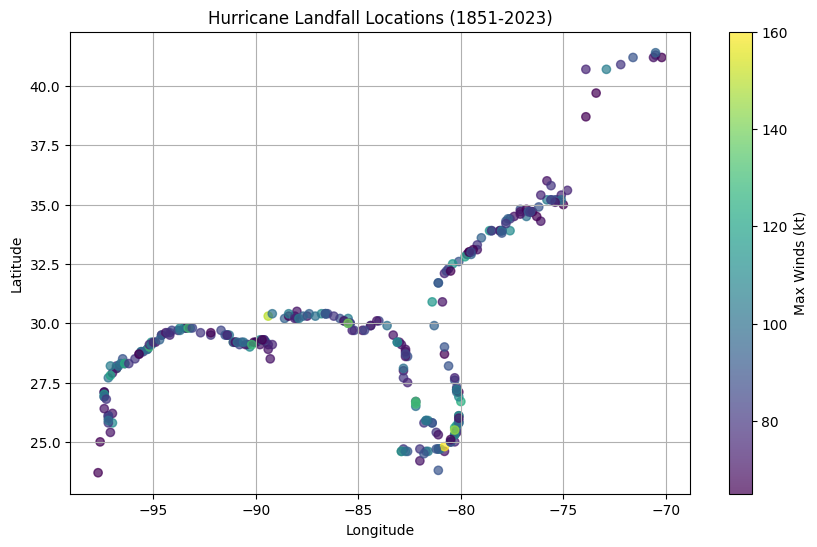

In [4]:
# Plot geographic distribution of hurricane landfalls
plt.figure(figsize=(10, 6))
plt.scatter(data['Longitude'], data['Latitude'], c=data['Max Winds (kt)'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Max Winds (kt)')
plt.title('Hurricane Landfall Locations (1851-2023)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# Step 4: Temporal Analysis

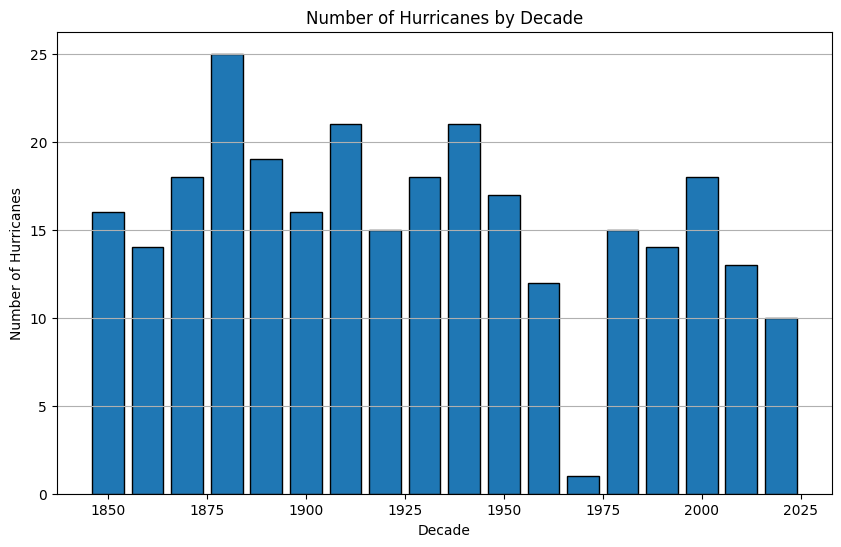

In [5]:
# Hurricane count by decade
data['Decade'] = (data['Datetime'].dt.year // 10) * 10
decade_counts = data.groupby('Decade').size()

plt.figure(figsize=(10, 6))
plt.bar(decade_counts.index, decade_counts.values, width=8, edgecolor='black')
plt.title('Number of Hurricanes by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Hurricanes')
plt.grid(axis='y')
plt.show()

# Step 5: Intensity Analysis

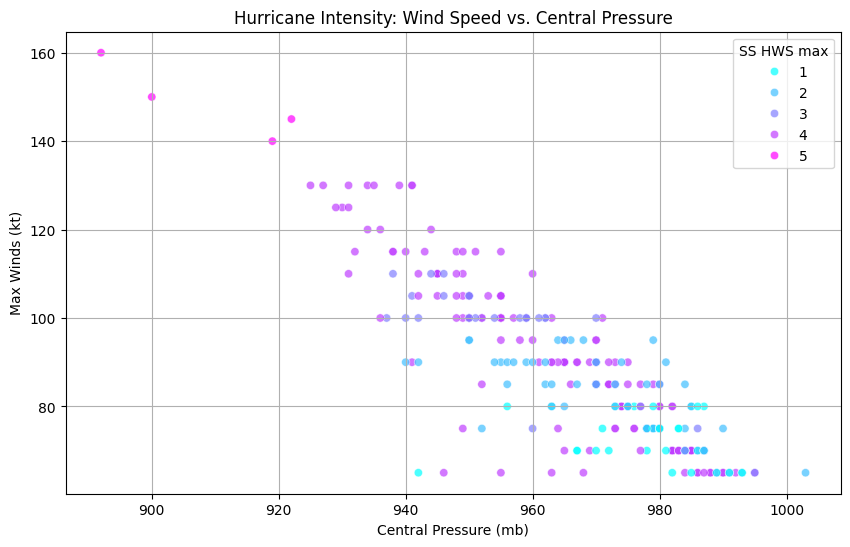

In [6]:
# Relationship between max wind speed and central pressure
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Central Pressure (mb)', y='Max Winds (kt)', data=data, hue='SS HWS max', palette='cool', alpha=0.7)
plt.title('Hurricane Intensity: Wind Speed vs. Central Pressure')
plt.xlabel('Central Pressure (mb)')
plt.ylabel('Max Winds (kt)')
plt.legend(title='SS HWS max')
plt.grid(True)
plt.show()

# Step 6: Correlation Heatmap

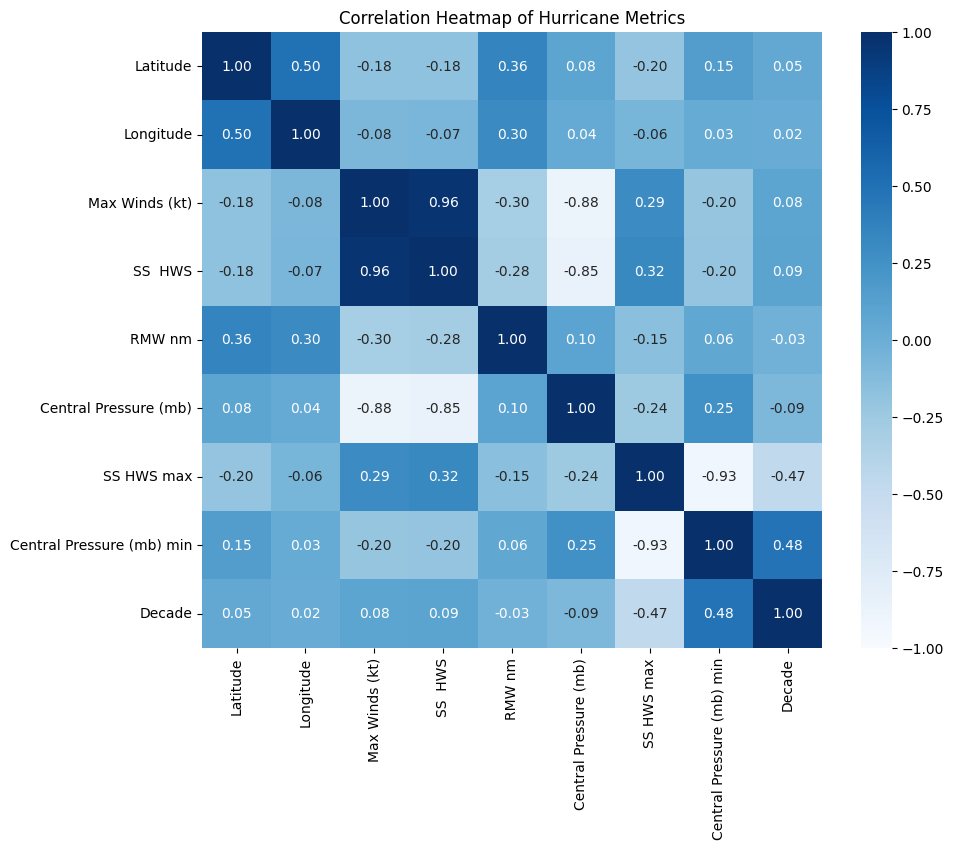

In [7]:
# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[float, int])
corr = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Hurricane Metrics')
plt.show()

# Additional Analysis


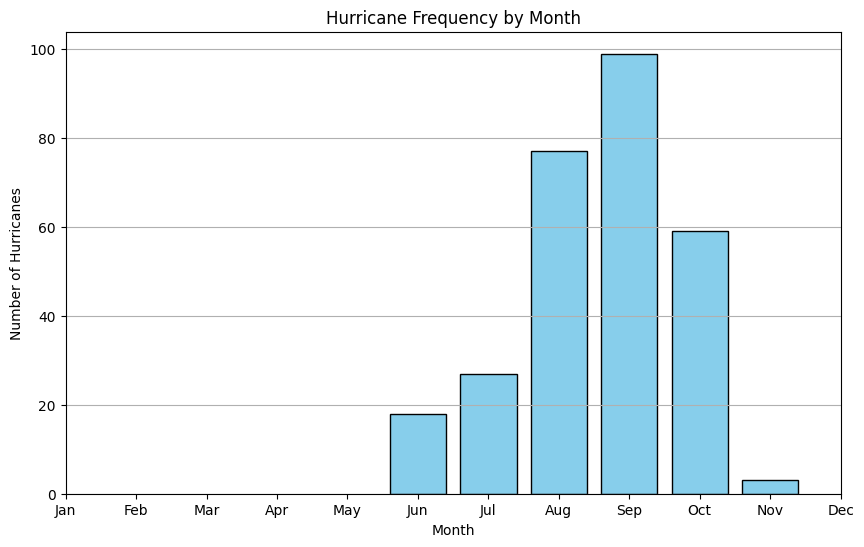

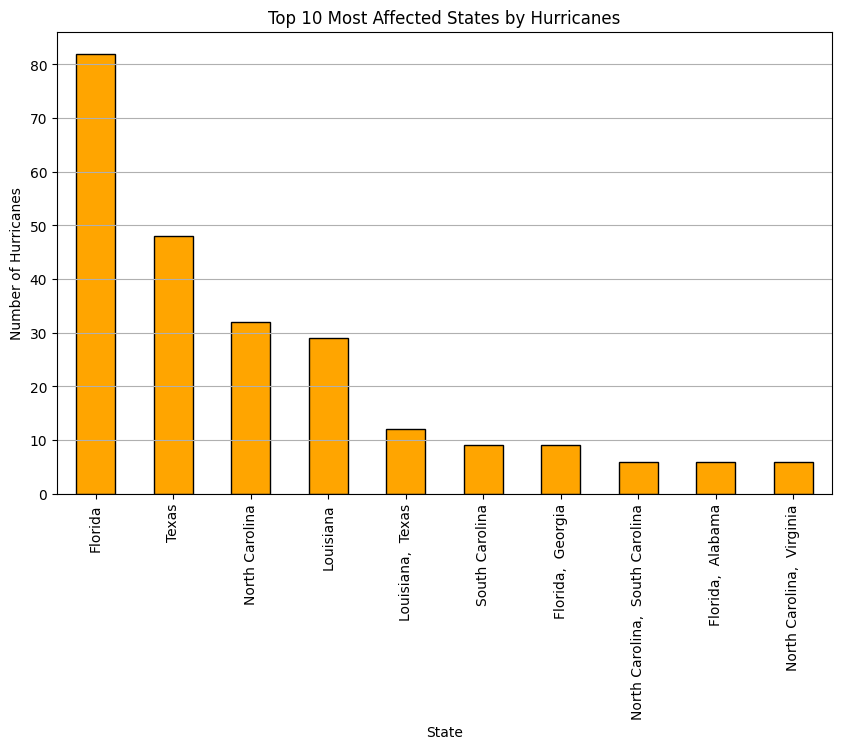

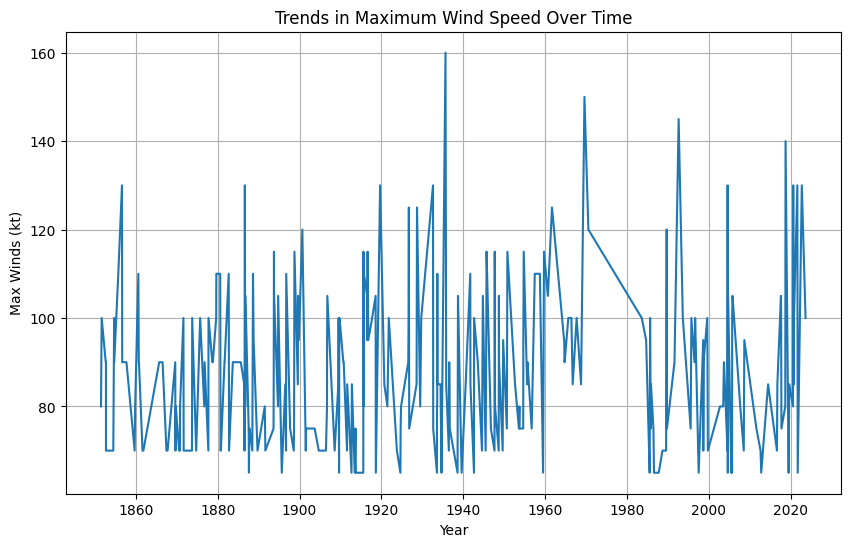

In [8]:
# Frequency of hurricanes by month
data['Month'] = data['Datetime'].dt.month
monthly_counts = data.groupby('Month').size()

plt.figure(figsize=(10, 6))
plt.bar(monthly_counts.index, monthly_counts.values, color='skyblue', edgecolor='black')
plt.title('Hurricane Frequency by Month')
plt.xlabel('Month')
plt.ylabel('Number of Hurricanes')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.show()

# Most affected states analysis
state_counts = data['All States Affected'].explode().value_counts()

plt.figure(figsize=(10, 6))
state_counts.head(10).plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 10 Most Affected States by Hurricanes')
plt.xlabel('State')
plt.ylabel('Number of Hurricanes')
plt.grid(axis='y')
plt.show()

# Trends in maximum wind speed over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Datetime', y='Max Winds (kt)', data=data, errorbar=None)
plt.title('Trends in Maximum Wind Speed Over Time')
plt.xlabel('Year')
plt.ylabel('Max Winds (kt)')
plt.grid(True)
plt.show()

# Final Insights

# The analysis provides the following insights:
1. The frequency of hurricanes has fluctuated over time, with a notable increase in recent decades.
2. September is the peak month for hurricane activity, followed by August and October.
3. Florida is the most affected state, reflecting its geographic vulnerability.
4. There is a clear inverse relationship between central pressure and maximum wind speed.
5. The intensity of hurricanes appears to show an increasing trend, potentially linked to climate change.


